In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import dalecLoad
import spectralConv

In [3]:
# first let's see if my new loading /processing functions work

levenBoatPath = 'data/16-jun-22/Leven/LOG_0051-boats.dtf'
LevenJettyPath = 'data/16-jun-22/Leven/LOG_0054-jetty.dtf'
GartmornPath = 'data/16-jun-22/Gartmorn/LOG_0056.dtf'
BalloPath = 'data/16-jun-22/Ballo/LOG_0055.dtf'

spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths(levenBoatPath)

levenBoatLog = dalecLoad.load_DALEC_log(levenBoatPath)
levenJettyLog = dalecLoad.load_DALEC_log(LevenJettyPath)
GartmornLog = dalecLoad.load_DALEC_log(GartmornPath)
BalloLog = dalecLoad.load_DALEC_log(BalloPath)

levenBoatLog.index.levels[0] # looks like this has been sorted and converted to an int correctly!

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='Sample #')

In [6]:
meanSpectraLevenBoat = dalecLoad.uniform_grid_spectra_mean(levenBoatLog, spect_wavelengths, nsteps=601, min_waveL=400, max_waveL=1000)
meanSpectraLevenJetty = dalecLoad.uniform_grid_spectra_mean(levenJettyLog, spect_wavelengths, nsteps=601, min_waveL=400, max_waveL=1000)
meanSpectraGartmorn = dalecLoad.uniform_grid_spectra_mean(GartmornLog, spect_wavelengths, nsteps=601, min_waveL=400, max_waveL=1000)
meanSpectraBallo = dalecLoad.uniform_grid_spectra_mean(BalloLog, spect_wavelengths, nsteps=601, min_waveL=400, max_waveL=1000)

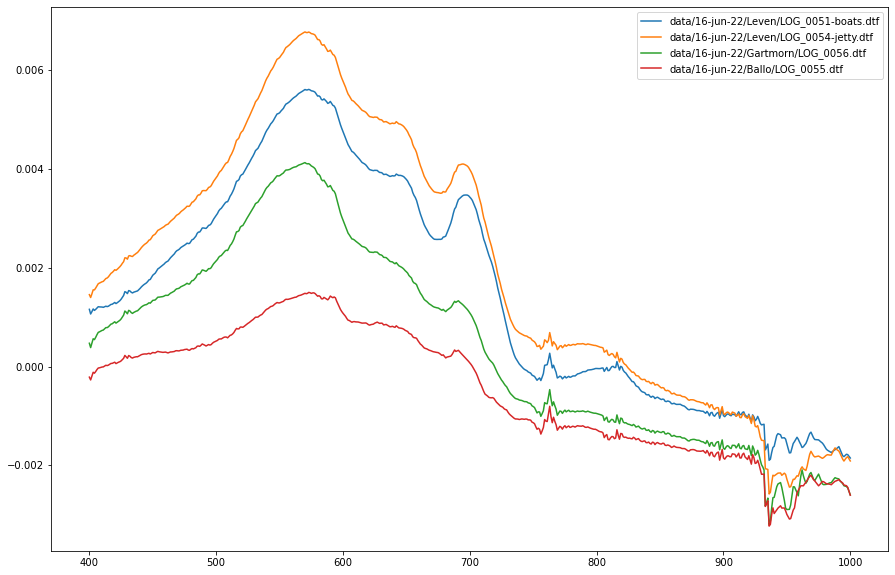

In [7]:
RHO = 0.028

paths = [levenBoatPath, LevenJettyPath, GartmornPath, BalloPath]

fig, ax = plt.subplots(figsize=(15, 10))

for path in paths:
    log =  dalecLoad.load_DALEC_log(path)
    meanSpectra = dalecLoad.uniform_grid_spectra_mean(log, spect_wavelengths)
    Rrs = (meanSpectra['Lu_mean'] - (RHO * meanSpectra['Lsky_mean'])) / meanSpectra['Ed_mean']
    plt.plot(meanSpectra['Wavelength'], Rrs, label=path)
plt.legend()
plt.show()    

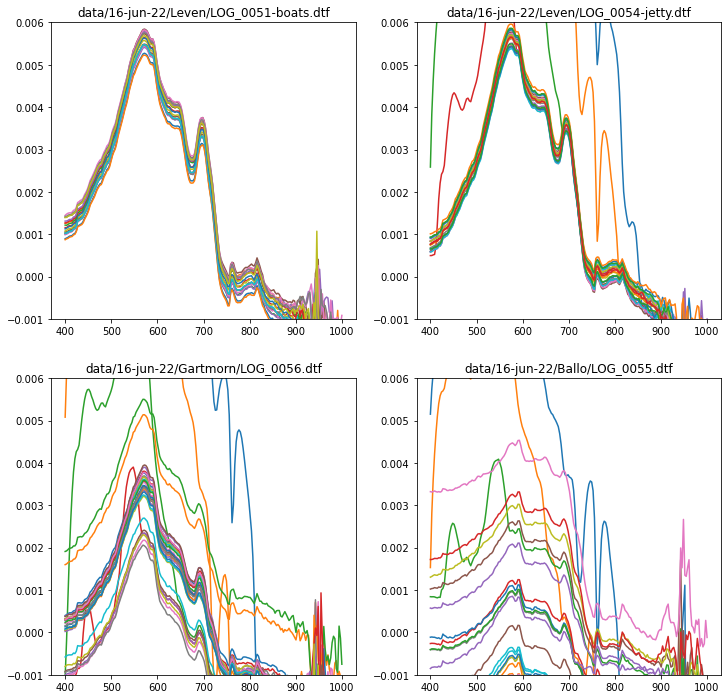

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax = ax.flatten()

for i in range(4):
    log =  dalecLoad.load_DALEC_log(paths[i])
    for sample in log.index.get_level_values('Sample #').unique():
        spectra = dalecLoad.uniform_grid_spectra_Rrs(log.loc[sample],
                                                     spect_wavelengths,
                                                     nsteps=200)
        ax[i].plot(spectra['Wavelength'], spectra['Rrs'])
    ax[i].set_title(paths[i])
    ax[i].set_ylim(-0.001, 0.006)